<a href="https://colab.research.google.com/github/sarabdar/keras/blob/main/Classification_Model_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST database, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems

In [1]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


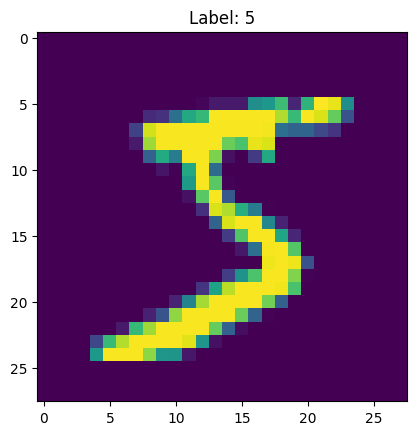

In [2]:
import matplotlib.pyplot as plt

# Show first image
plt.imshow(X_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [3]:
X_train.shape

(60000, 28, 28)

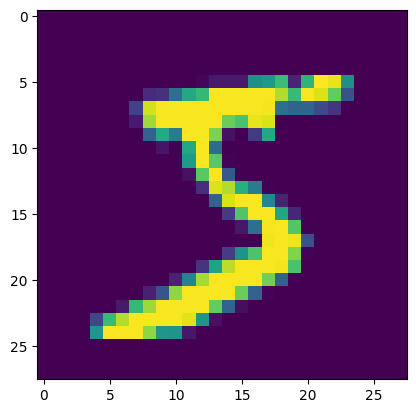

In [4]:
plt.imshow(X_train[0])

In [6]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils import to_categorical

# Before doing anything else we will do some preprocessing

In this notebook i will do:


1.   Flatten the 2D arrays
2.   Normalize the values
3.   One-Hot encoding



In [8]:
X_train[0].shape

(28, 28)

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [11]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Above ->  X_train.shape[0]  gives the number of images which is 60,000 then the num_pixels which are 28*28= 784  

## So in the end we have a new shape-> 784 of all 60,000 images

In [12]:
X_train[0].shape

(784,)

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [13]:
# Normalize

X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

For classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [15]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


# Noe lets move to Building the Neural Network

In [16]:
model = Sequential()

In [17]:
# Define the input shape of our model
model.add(Input(shape=(num_pixels,)))

In [18]:
# Making the input layer with actual neurons
model.add(Dense(num_pixels, activation='relu'))

In [19]:
# Making hidden layer
model.add(Dense(100, activation='relu'))

Because we want classification so it will fall into 1 or the categories

In [20]:
# Making output Layer
model.add(Dense(num_classes, activation='softmax'))

In [21]:
# Now, compiling

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)

Accuracy?.............

In [24]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [25]:
print('Accuracy: {}% \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.9817000031471252% 
 Error: 0.018299996852874756


Now, lets save our model!

In [26]:
model.save('classification_model.keras')

How to load the saved file?.............

In [27]:
pretrained_model = keras.saving.load_model('classification_model.keras')